In [1]:
%load_ext watermark
%watermark -a Chan -d -v -p numpy,pandas,sklearn,konlpy,tensorflow,matplotlib,imblearn

Using TensorFlow backend.


Chan 2019-08-22 

CPython 3.7.3
IPython 7.6.1

numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
konlpy 0.5.1
tensorflow 1.14.0
matplotlib 3.1.0
imblearn 0.5.0


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from konlpy.tag import Okt
import tensorflow as tf
from tensorflow.python.keras.preprocessing import sequence
from tensorflow import keras
from tqdm import tqdm
from collections import Counter
from matplotlib import pyplot as plt
import pickle

# Load datasets

In [3]:
datasets = pd.read_csv('../../data/train.csv', engine='python', encoding='utf-16')
datasets.head()

,Unnamed: 0,comment,url_id,label
0,0,ㅜㅜ,77,0
1,1,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,17,0
2,2,헐,52,0
3,3,제시,75,0
4,4,이거인 듯,18,0


In [4]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 4 columns):
Unnamed: 0    42000 non-null int64
comment       42000 non-null object
url_id        42000 non-null int64
label         42000 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.3+ MB


In [5]:
morped =[_.encode('utf-8') for _ in tqdm(datasets.comment)]
morped[:5]

100%|████████████████████████████████████████████████████████████████████████| 42000/42000 [00:00<00:00, 389115.52it/s]


[b'\xe3\x85\x9c\xe3\x85\x9c',
 b'\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b\xe3\x85\x8b',
 b'\xed\x97\x90',
 b'\xec\xa0\x9c\xec\x8b\x9c',
 b'\xec\x9d\xb4\xea\xb1\xb0\xec\x9d\xb8 \xeb\x93\xaf']

In [6]:
bytarr = []
[bytarr.append([str(_) for _ in morped[i]]) for i in range(len(morped))]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

# 형태소분석

In [7]:
vocab_size = 175

pad_id = 0
oov_id = 1
index_offset = 1

def make_vocab(sentences):
    word_counter = Counter()

    for sent in sentences:
        word_counter.update(sent)

    most_common = word_counter.most_common()
    print("고빈도 단어:")
    for k, v in most_common[:10]:
        print(k, ": ", v)

    vocab = {
    '<PAD>': pad_id,
    '<OOV>': oov_id
    }
    for i, (word, cnt) in enumerate(most_common, start=index_offset+1):
        vocab[str(word)] = i
        if len(vocab) >= vocab_size:
            break

    return vocab

word_index = make_vocab(bytarr)
word_inverted_index = {v:k for k, v in word_index.items()}

print("\n단어 사전:")
for i in range(0, 10):
    print(i, word_inverted_index[i])

print("\n단어 사전 크기: ", len(word_index))

# # vocab save
# with open('./vocab/vocab_index.pickle', 'wb') as f:
#     pickle.dump(word_index, f, pickle.HIGHEST_PROTOCOL)
# with open('./vocab/vocab_inverted_index.pickle', 'wb') as f:
#     pickle.dump(word_inverted_index, f, pickle.HIGHEST_PROTOCOL)

고빈도 단어:
133 :  94992
227 :  94926
139 :  94675
236 :  85378
235 :  70509
32 :  42738
132 :  25626
234 :  24976
180 :  21650
176 :  21395

단어 사전:
0 <PAD>
1 <OOV>
2 133
3 227
4 139
5 236
6 235
7 32
8 132
9 234

단어 사전 크기:  175


In [8]:
def index_to_text(indexes):
    return ' '.join([word_inverted_index[i] for i in indexes])

def text_to_index(tokens):
    indexes = []
    for tok in tokens:
        if tok in word_index:
            indexes.append(word_index[tok])
        else:
            indexes.append(oov_id)

    return indexes

print("원본: ", bytarr[0])
ids = text_to_index(bytarr[0])
print("문자 -> 숫자: ", ids)
print("숫자 -> 문자: ", index_to_text(ids))

원본:  ['227', '133', '156', '227', '133', '156']
문자 -> 숫자:  [3, 2, 19, 3, 2, 19]
숫자 -> 문자:  227 133 156 227 133 156


In [9]:
x_variable = [text_to_index(_) for _ in bytarr]

sentence_size = 50
x_padded = sequence.pad_sequences(x_variable,
                                 maxlen=sentence_size,
                                 truncating='post',
                                 padding='post',
                                 value=pad_id)

In [10]:
def plot_loss(history):
    plt.figure(figsize=(6,5))
    val = plt.plot(history.epoch, history.history['val_loss'],
                 '--', label='Test')
    plt.plot(history.epoch, history.history['loss'], color=val[0].get_color(),
           label='Train')

    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.legend()

    plt.xlim([0,max(history.epoch)])

In [11]:
import warnings
warnings.filterwarnings(action='once')


# 데이터 클래스 불균형 문제 해결하자

In [12]:
from imblearn.under_sampling import RandomUnderSampler

In [13]:
down_X, down_y = RandomUnderSampler().fit_resample(x_padded, datasets.label)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(down_X, down_y)

In [31]:
# 총 데이터 수 , 1 레이블 데이터 수
len(down_y), down_y.sum()

(4192, 2096)

In [15]:
model = keras.Sequential([
    keras.layers.Embedding(175, 32),
    keras.layers.Conv1D(128, 16, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(128, 8, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(64, 8, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(64, 4, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 4, padding="same", activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Conv1D(32, 2, padding="same", activation=tf.nn.relu),
    keras.layers.GlobalMaxPool1D(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation=tf.nn.sigmoid)
])

W0822 11:19:44.039486  7080 deprecation.py:506] From C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0822 11:19:44.047484  7080 deprecation.py:506] From C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
C:\Users\skarn\Anaconda3\envs\DataAnalysis\lib\site-packages\tensorflow\python\ops\nn_ops.py:61: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from

Train on 3144 samples, validate on 1048 samples
Epoch 1/20
3144/3144 [==============================] - ETA: 2:46 - loss: 0.4523 - recall_1: 0.78 - ETA: 1:34 - loss: 0.4026 - recall_1: 0.82 - ETA: 1:09 - loss: 0.4023 - recall_1: 0.80 - ETA: 57s - loss: 0.4311 - recall_1: 0.7969 - ETA: 49s - loss: 0.4091 - recall_1: 0.812 - ETA: 43s - loss: 0.4069 - recall_1: 0.812 - ETA: 39s - loss: 0.3971 - recall_1: 0.825 - ETA: 36s - loss: 0.3824 - recall_1: 0.832 - ETA: 33s - loss: 0.3885 - recall_1: 0.822 - ETA: 31s - loss: 0.3832 - recall_1: 0.828 - ETA: 31s - loss: 0.3773 - recall_1: 0.832 - ETA: 31s - loss: 0.3970 - recall_1: 0.822 - ETA: 31s - loss: 0.4083 - recall_1: 0.824 - ETA: 29s - loss: 0.4061 - recall_1: 0.823 - ETA: 28s - loss: 0.4022 - recall_1: 0.822 - ETA: 27s - loss: 0.4005 - recall_1: 0.826 - ETA: 25s - loss: 0.3950 - recall_1: 0.832 - ETA: 24s - loss: 0.3946 - recall_1: 0.831 - ETA: 23s - loss: 0.3947 - recall_1: 0.833 - ETA: 23s - loss: 0.3882 - recall_1: 0.837 - ETA: 22s - loss

3144/3144 [==============================] - ETA: 16s - loss: 0.3319 - recall_1: 0.843 - ETA: 19s - loss: 0.3004 - recall_1: 0.859 - ETA: 21s - loss: 0.3101 - recall_1: 0.875 - ETA: 22s - loss: 0.3234 - recall_1: 0.859 - ETA: 21s - loss: 0.3232 - recall_1: 0.868 - ETA: 20s - loss: 0.3099 - recall_1: 0.880 - ETA: 21s - loss: 0.3025 - recall_1: 0.883 - ETA: 20s - loss: 0.2955 - recall_1: 0.882 - ETA: 20s - loss: 0.3210 - recall_1: 0.871 - ETA: 19s - loss: 0.3139 - recall_1: 0.875 - ETA: 18s - loss: 0.3123 - recall_1: 0.880 - ETA: 18s - loss: 0.3071 - recall_1: 0.882 - ETA: 17s - loss: 0.3214 - recall_1: 0.875 - ETA: 17s - loss: 0.3115 - recall_1: 0.879 - ETA: 16s - loss: 0.3070 - recall_1: 0.877 - ETA: 16s - loss: 0.3060 - recall_1: 0.875 - ETA: 15s - loss: 0.3134 - recall_1: 0.869 - ETA: 15s - loss: 0.3122 - recall_1: 0.869 - ETA: 15s - loss: 0.3107 - recall_1: 0.871 - ETA: 14s - loss: 0.3100 - recall_1: 0.871 - ETA: 14s - loss: 0.3040 - recall_1: 0.876 - ETA: 15s - loss: 0.3070 - recal

3144/3144 [==============================] - ETA: 13s - loss: 0.1739 - recall_1: 0.968 - ETA: 17s - loss: 0.2809 - recall_1: 0.875 - ETA: 18s - loss: 0.2774 - recall_1: 0.854 - ETA: 22s - loss: 0.2950 - recall_1: 0.843 - ETA: 21s - loss: 0.2973 - recall_1: 0.850 - ETA: 21s - loss: 0.3006 - recall_1: 0.859 - ETA: 20s - loss: 0.3143 - recall_1: 0.857 - ETA: 21s - loss: 0.3015 - recall_1: 0.863 - ETA: 21s - loss: 0.2914 - recall_1: 0.875 - ETA: 21s - loss: 0.2927 - recall_1: 0.871 - ETA: 22s - loss: 0.2988 - recall_1: 0.875 - ETA: 24s - loss: 0.3077 - recall_1: 0.872 - ETA: 27s - loss: 0.2970 - recall_1: 0.877 - ETA: 28s - loss: 0.2893 - recall_1: 0.881 - ETA: 27s - loss: 0.2944 - recall_1: 0.883 - ETA: 26s - loss: 0.2980 - recall_1: 0.878 - ETA: 25s - loss: 0.2874 - recall_1: 0.886 - ETA: 25s - loss: 0.2874 - recall_1: 0.887 - ETA: 24s - loss: 0.2838 - recall_1: 0.889 - ETA: 24s - loss: 0.2880 - recall_1: 0.887 - ETA: 23s - loss: 0.2869 - recall_1: 0.888 - ETA: 23s - loss: 0.2871 - recal

3144/3144 [==============================] - ETA: 25s - loss: 0.3044 - recall_1: 0.875 - ETA: 31s - loss: 0.2380 - recall_1: 0.921 - ETA: 33s - loss: 0.2125 - recall_1: 0.947 - ETA: 34s - loss: 0.2430 - recall_1: 0.929 - ETA: 33s - loss: 0.2205 - recall_1: 0.943 - ETA: 32s - loss: 0.2295 - recall_1: 0.937 - ETA: 32s - loss: 0.2271 - recall_1: 0.933 - ETA: 31s - loss: 0.2135 - recall_1: 0.941 - ETA: 31s - loss: 0.2206 - recall_1: 0.937 - ETA: 30s - loss: 0.2500 - recall_1: 0.918 - ETA: 29s - loss: 0.2535 - recall_1: 0.914 - ETA: 28s - loss: 0.2699 - recall_1: 0.903 - ETA: 27s - loss: 0.2666 - recall_1: 0.906 - ETA: 28s - loss: 0.2670 - recall_1: 0.906 - ETA: 28s - loss: 0.2657 - recall_1: 0.906 - ETA: 28s - loss: 0.2747 - recall_1: 0.900 - ETA: 28s - loss: 0.2701 - recall_1: 0.902 - ETA: 27s - loss: 0.2695 - recall_1: 0.902 - ETA: 26s - loss: 0.2684 - recall_1: 0.904 - ETA: 25s - loss: 0.2661 - recall_1: 0.906 - ETA: 25s - loss: 0.2731 - recall_1: 0.904 - ETA: 24s - loss: 0.2651 - recal

3144/3144 [==============================] - ETA: 25s - loss: 0.3582 - recall_1: 0.875 - ETA: 25s - loss: 0.3030 - recall_1: 0.890 - ETA: 24s - loss: 0.2407 - recall_1: 0.916 - ETA: 28s - loss: 0.2501 - recall_1: 0.906 - ETA: 32s - loss: 0.2650 - recall_1: 0.887 - ETA: 31s - loss: 0.2558 - recall_1: 0.895 - ETA: 30s - loss: 0.2613 - recall_1: 0.901 - ETA: 29s - loss: 0.2742 - recall_1: 0.890 - ETA: 28s - loss: 0.2707 - recall_1: 0.895 - ETA: 28s - loss: 0.2743 - recall_1: 0.887 - ETA: 28s - loss: 0.2744 - recall_1: 0.886 - ETA: 27s - loss: 0.2727 - recall_1: 0.888 - ETA: 27s - loss: 0.2669 - recall_1: 0.891 - ETA: 27s - loss: 0.2701 - recall_1: 0.897 - ETA: 27s - loss: 0.2709 - recall_1: 0.891 - ETA: 27s - loss: 0.2751 - recall_1: 0.890 - ETA: 27s - loss: 0.2747 - recall_1: 0.889 - ETA: 27s - loss: 0.2744 - recall_1: 0.887 - ETA: 26s - loss: 0.2714 - recall_1: 0.891 - ETA: 25s - loss: 0.2700 - recall_1: 0.893 - ETA: 25s - loss: 0.2706 - recall_1: 0.892 - ETA: 24s - loss: 0.2703 - recal

3144/3144 [==============================] - ETA: 26s - loss: 0.2858 - recall_1: 0.906 - ETA: 25s - loss: 0.4268 - recall_1: 0.890 - ETA: 27s - loss: 0.4464 - recall_1: 0.895 - ETA: 27s - loss: 0.4064 - recall_1: 0.890 - ETA: 26s - loss: 0.3534 - recall_1: 0.893 - ETA: 26s - loss: 0.3413 - recall_1: 0.895 - ETA: 26s - loss: 0.3141 - recall_1: 0.901 - ETA: 27s - loss: 0.2917 - recall_1: 0.910 - ETA: 28s - loss: 0.2688 - recall_1: 0.920 - ETA: 28s - loss: 0.2615 - recall_1: 0.921 - ETA: 29s - loss: 0.2517 - recall_1: 0.926 - ETA: 30s - loss: 0.2592 - recall_1: 0.921 - ETA: 29s - loss: 0.2611 - recall_1: 0.918 - ETA: 29s - loss: 0.2579 - recall_1: 0.915 - ETA: 28s - loss: 0.2538 - recall_1: 0.916 - ETA: 27s - loss: 0.2548 - recall_1: 0.916 - ETA: 27s - loss: 0.2580 - recall_1: 0.915 - ETA: 26s - loss: 0.2537 - recall_1: 0.916 - ETA: 26s - loss: 0.2584 - recall_1: 0.914 - ETA: 26s - loss: 0.2720 - recall_1: 0.910 - ETA: 26s - loss: 0.2693 - recall_1: 0.912 - ETA: 25s - loss: 0.2713 - recal

3144/3144 [==============================] - ETA: 18s - loss: 0.1742 - recall_1: 0.968 - ETA: 23s - loss: 0.2826 - recall_1: 0.921 - ETA: 31s - loss: 0.2833 - recall_1: 0.916 - ETA: 31s - loss: 0.2912 - recall_1: 0.906 - ETA: 31s - loss: 0.3026 - recall_1: 0.906 - ETA: 40s - loss: 0.2854 - recall_1: 0.911 - ETA: 39s - loss: 0.2711 - recall_1: 0.915 - ETA: 38s - loss: 0.2628 - recall_1: 0.914 - ETA: 36s - loss: 0.2537 - recall_1: 0.913 - ETA: 37s - loss: 0.2509 - recall_1: 0.918 - ETA: 39s - loss: 0.2437 - recall_1: 0.920 - ETA: 40s - loss: 0.2369 - recall_1: 0.924 - ETA: 44s - loss: 0.2320 - recall_1: 0.927 - ETA: 47s - loss: 0.2205 - recall_1: 0.933 - ETA: 46s - loss: 0.2201 - recall_1: 0.931 - ETA: 45s - loss: 0.2130 - recall_1: 0.933 - ETA: 45s - loss: 0.2170 - recall_1: 0.932 - ETA: 43s - loss: 0.2150 - recall_1: 0.930 - ETA: 43s - loss: 0.2217 - recall_1: 0.927 - ETA: 42s - loss: 0.2168 - recall_1: 0.931 - ETA: 42s - loss: 0.2100 - recall_1: 0.934 - ETA: 44s - loss: 0.2108 - recal

3144/3144 [==============================] - ETA: 17s - loss: 0.2573 - recall_1: 0.906 - ETA: 18s - loss: 0.1800 - recall_1: 0.937 - ETA: 21s - loss: 0.1961 - recall_1: 0.916 - ETA: 22s - loss: 0.1905 - recall_1: 0.914 - ETA: 23s - loss: 0.1846 - recall_1: 0.925 - ETA: 23s - loss: 0.1949 - recall_1: 0.927 - ETA: 24s - loss: 0.1802 - recall_1: 0.937 - ETA: 24s - loss: 0.1913 - recall_1: 0.933 - ETA: 25s - loss: 0.1849 - recall_1: 0.934 - ETA: 24s - loss: 0.1863 - recall_1: 0.934 - ETA: 24s - loss: 0.1915 - recall_1: 0.931 - ETA: 24s - loss: 0.1911 - recall_1: 0.932 - ETA: 23s - loss: 0.1872 - recall_1: 0.932 - ETA: 23s - loss: 0.1973 - recall_1: 0.930 - ETA: 23s - loss: 0.1956 - recall_1: 0.933 - ETA: 23s - loss: 0.1993 - recall_1: 0.929 - ETA: 22s - loss: 0.2057 - recall_1: 0.926 - ETA: 22s - loss: 0.2119 - recall_1: 0.927 - ETA: 22s - loss: 0.2162 - recall_1: 0.922 - ETA: 22s - loss: 0.2157 - recall_1: 0.921 - ETA: 22s - loss: 0.2174 - recall_1: 0.922 - ETA: 22s - loss: 0.2141 - recal

3144/3144 [==============================] - ETA: 24s - loss: 0.1794 - recall_1: 0.937 - ETA: 32s - loss: 0.2081 - recall_1: 0.906 - ETA: 35s - loss: 0.2087 - recall_1: 0.916 - ETA: 32s - loss: 0.2042 - recall_1: 0.914 - ETA: 31s - loss: 0.2130 - recall_1: 0.912 - ETA: 29s - loss: 0.2029 - recall_1: 0.916 - ETA: 27s - loss: 0.3202 - recall_1: 0.906 - ETA: 26s - loss: 0.2883 - recall_1: 0.914 - ETA: 25s - loss: 0.2723 - recall_1: 0.920 - ETA: 24s - loss: 0.2572 - recall_1: 0.921 - ETA: 24s - loss: 0.2519 - recall_1: 0.920 - ETA: 24s - loss: 0.2416 - recall_1: 0.921 - ETA: 23s - loss: 0.2402 - recall_1: 0.923 - ETA: 23s - loss: 0.2419 - recall_1: 0.919 - ETA: 23s - loss: 0.2483 - recall_1: 0.920 - ETA: 23s - loss: 0.2488 - recall_1: 0.919 - ETA: 23s - loss: 0.2437 - recall_1: 0.919 - ETA: 23s - loss: 0.2410 - recall_1: 0.918 - ETA: 24s - loss: 0.2334 - recall_1: 0.922 - ETA: 24s - loss: 0.2310 - recall_1: 0.923 - ETA: 24s - loss: 0.2300 - recall_1: 0.924 - ETA: 24s - loss: 0.2290 - recal

3144/3144 [==============================] - ETA: 27s - loss: 0.2599 - recall_1: 0.906 - ETA: 30s - loss: 0.2037 - recall_1: 0.921 - ETA: 31s - loss: 0.1955 - recall_1: 0.927 - ETA: 31s - loss: 0.2141 - recall_1: 0.921 - ETA: 31s - loss: 0.2308 - recall_1: 0.906 - ETA: 31s - loss: 0.2350 - recall_1: 0.906 - ETA: 29s - loss: 0.2488 - recall_1: 0.901 - ETA: 28s - loss: 0.2631 - recall_1: 0.894 - ETA: 27s - loss: 0.2591 - recall_1: 0.899 - ETA: 26s - loss: 0.2527 - recall_1: 0.903 - ETA: 25s - loss: 0.2618 - recall_1: 0.897 - ETA: 25s - loss: 0.2544 - recall_1: 0.903 - ETA: 24s - loss: 0.2565 - recall_1: 0.899 - ETA: 24s - loss: 0.2470 - recall_1: 0.904 - ETA: 24s - loss: 0.2488 - recall_1: 0.904 - ETA: 24s - loss: 0.2406 - recall_1: 0.910 - ETA: 24s - loss: 0.2401 - recall_1: 0.911 - ETA: 24s - loss: 0.2382 - recall_1: 0.913 - ETA: 24s - loss: 0.2320 - recall_1: 0.916 - ETA: 24s - loss: 0.2444 - recall_1: 0.910 - ETA: 24s - loss: 0.2477 - recall_1: 0.912 - ETA: 23s - loss: 0.2465 - recal

3144/3144 [==============================] - ETA: 22s - loss: 0.0657 - recall_1: 1.000 - ETA: 21s - loss: 0.1171 - recall_1: 0.968 - ETA: 21s - loss: 0.1573 - recall_1: 0.958 - ETA: 21s - loss: 0.1789 - recall_1: 0.945 - ETA: 20s - loss: 0.1821 - recall_1: 0.943 - ETA: 20s - loss: 0.1981 - recall_1: 0.937 - ETA: 21s - loss: 0.2228 - recall_1: 0.919 - ETA: 21s - loss: 0.2276 - recall_1: 0.921 - ETA: 22s - loss: 0.2328 - recall_1: 0.920 - ETA: 22s - loss: 0.2416 - recall_1: 0.912 - ETA: 22s - loss: 0.2317 - recall_1: 0.914 - ETA: 22s - loss: 0.2203 - recall_1: 0.919 - ETA: 22s - loss: 0.2165 - recall_1: 0.920 - ETA: 22s - loss: 0.2064 - recall_1: 0.926 - ETA: 21s - loss: 0.2010 - recall_1: 0.927 - ETA: 21s - loss: 0.2089 - recall_1: 0.925 - ETA: 20s - loss: 0.2093 - recall_1: 0.928 - ETA: 20s - loss: 0.2341 - recall_1: 0.927 - ETA: 20s - loss: 0.2278 - recall_1: 0.927 - ETA: 20s - loss: 0.2326 - recall_1: 0.925 - ETA: 20s - loss: 0.2323 - recall_1: 0.922 - ETA: 20s - loss: 0.2345 - recal

3144/3144 [==============================] - ETA: 36s - loss: 0.1633 - recall_1: 0.937 - ETA: 35s - loss: 0.1409 - recall_1: 0.953 - ETA: 34s - loss: 0.1511 - recall_1: 0.947 - ETA: 33s - loss: 0.1604 - recall_1: 0.945 - ETA: 31s - loss: 0.1677 - recall_1: 0.943 - ETA: 31s - loss: 0.1562 - recall_1: 0.947 - ETA: 30s - loss: 0.1492 - recall_1: 0.950 - ETA: 29s - loss: 0.1599 - recall_1: 0.949 - ETA: 29s - loss: 0.1674 - recall_1: 0.944 - ETA: 28s - loss: 0.1623 - recall_1: 0.943 - ETA: 27s - loss: 0.1630 - recall_1: 0.943 - ETA: 26s - loss: 0.1631 - recall_1: 0.945 - ETA: 26s - loss: 0.1598 - recall_1: 0.947 - ETA: 25s - loss: 0.1535 - recall_1: 0.948 - ETA: 25s - loss: 0.1565 - recall_1: 0.945 - ETA: 24s - loss: 0.1545 - recall_1: 0.945 - ETA: 24s - loss: 0.1553 - recall_1: 0.944 - ETA: 23s - loss: 0.1518 - recall_1: 0.946 - ETA: 23s - loss: 0.1462 - recall_1: 0.949 - ETA: 22s - loss: 0.1433 - recall_1: 0.951 - ETA: 22s - loss: 0.1567 - recall_1: 0.949 - ETA: 22s - loss: 0.1522 - recal

3144/3144 [==============================] - ETA: 31s - loss: 0.1223 - recall_1: 0.968 - ETA: 31s - loss: 0.3369 - recall_1: 0.906 - ETA: 32s - loss: 0.2899 - recall_1: 0.916 - ETA: 31s - loss: 0.2531 - recall_1: 0.921 - ETA: 30s - loss: 0.2661 - recall_1: 0.906 - ETA: 30s - loss: 0.2830 - recall_1: 0.901 - ETA: 30s - loss: 0.2867 - recall_1: 0.897 - ETA: 29s - loss: 0.2845 - recall_1: 0.894 - ETA: 29s - loss: 0.2750 - recall_1: 0.899 - ETA: 28s - loss: 0.2608 - recall_1: 0.906 - ETA: 27s - loss: 0.2488 - recall_1: 0.911 - ETA: 26s - loss: 0.2426 - recall_1: 0.914 - ETA: 26s - loss: 0.2348 - recall_1: 0.913 - ETA: 25s - loss: 0.2283 - recall_1: 0.917 - ETA: 25s - loss: 0.2262 - recall_1: 0.920 - ETA: 25s - loss: 0.2186 - recall_1: 0.923 - ETA: 24s - loss: 0.2185 - recall_1: 0.922 - ETA: 24s - loss: 0.2175 - recall_1: 0.923 - ETA: 23s - loss: 0.2105 - recall_1: 0.927 - ETA: 23s - loss: 0.2068 - recall_1: 0.928 - ETA: 22s - loss: 0.2018 - recall_1: 0.931 - ETA: 22s - loss: 0.2043 - recal

3144/3144 [==============================] - ETA: 33s - loss: 0.0553 - recall_1: 1.000 - ETA: 31s - loss: 0.1931 - recall_1: 0.937 - ETA: 29s - loss: 0.1690 - recall_1: 0.947 - ETA: 29s - loss: 0.1573 - recall_1: 0.945 - ETA: 29s - loss: 0.1835 - recall_1: 0.925 - ETA: 29s - loss: 0.1858 - recall_1: 0.921 - ETA: 29s - loss: 0.2226 - recall_1: 0.906 - ETA: 28s - loss: 0.2145 - recall_1: 0.910 - ETA: 28s - loss: 0.2015 - recall_1: 0.916 - ETA: 28s - loss: 0.1958 - recall_1: 0.921 - ETA: 28s - loss: 0.1950 - recall_1: 0.920 - ETA: 27s - loss: 0.1963 - recall_1: 0.921 - ETA: 26s - loss: 0.1921 - recall_1: 0.925 - ETA: 26s - loss: 0.1909 - recall_1: 0.928 - ETA: 25s - loss: 0.1846 - recall_1: 0.931 - ETA: 24s - loss: 0.1803 - recall_1: 0.933 - ETA: 24s - loss: 0.1768 - recall_1: 0.933 - ETA: 24s - loss: 0.1767 - recall_1: 0.935 - ETA: 24s - loss: 0.1728 - recall_1: 0.937 - ETA: 23s - loss: 0.1755 - recall_1: 0.937 - ETA: 24s - loss: 0.1793 - recall_1: 0.936 - ETA: 23s - loss: 0.1903 - recal

3144/3144 [==============================] - ETA: 1:06 - loss: 0.0903 - recall_1: 0.96 - ETA: 45s - loss: 0.1118 - recall_1: 0.9688 - ETA: 40s - loss: 0.1028 - recall_1: 0.968 - ETA: 38s - loss: 0.1170 - recall_1: 0.968 - ETA: 38s - loss: 0.1316 - recall_1: 0.962 - ETA: 37s - loss: 0.1352 - recall_1: 0.953 - ETA: 35s - loss: 0.1323 - recall_1: 0.955 - ETA: 35s - loss: 0.1313 - recall_1: 0.957 - ETA: 34s - loss: 0.1307 - recall_1: 0.954 - ETA: 32s - loss: 0.1449 - recall_1: 0.946 - ETA: 30s - loss: 0.1510 - recall_1: 0.940 - ETA: 29s - loss: 0.1484 - recall_1: 0.940 - ETA: 29s - loss: 0.1543 - recall_1: 0.935 - ETA: 28s - loss: 0.1499 - recall_1: 0.937 - ETA: 27s - loss: 0.1492 - recall_1: 0.939 - ETA: 26s - loss: 0.1474 - recall_1: 0.941 - ETA: 25s - loss: 0.1556 - recall_1: 0.937 - ETA: 25s - loss: 0.1527 - recall_1: 0.937 - ETA: 24s - loss: 0.1497 - recall_1: 0.939 - ETA: 24s - loss: 0.1478 - recall_1: 0.940 - ETA: 23s - loss: 0.1514 - recall_1: 0.940 - ETA: 23s - loss: 0.1488 - reca

3144/3144 [==============================] - ETA: 20s - loss: 0.2641 - recall_1: 0.875 - ETA: 25s - loss: 0.2246 - recall_1: 0.890 - ETA: 29s - loss: 0.2694 - recall_1: 0.864 - ETA: 55s - loss: 0.2190 - recall_1: 0.890 - ETA: 53s - loss: 0.2504 - recall_1: 0.881 - ETA: 48s - loss: 0.2336 - recall_1: 0.885 - ETA: 50s - loss: 0.2407 - recall_1: 0.879 - ETA: 48s - loss: 0.2194 - recall_1: 0.894 - ETA: 45s - loss: 0.2042 - recall_1: 0.906 - ETA: 43s - loss: 0.1934 - recall_1: 0.915 - ETA: 43s - loss: 0.1829 - recall_1: 0.920 - ETA: 43s - loss: 0.1834 - recall_1: 0.921 - ETA: 45s - loss: 0.2070 - recall_1: 0.913 - ETA: 45s - loss: 0.2024 - recall_1: 0.915 - ETA: 44s - loss: 0.2173 - recall_1: 0.910 - ETA: 42s - loss: 0.2241 - recall_1: 0.910 - ETA: 42s - loss: 0.2235 - recall_1: 0.909 - ETA: 41s - loss: 0.2184 - recall_1: 0.909 - ETA: 41s - loss: 0.2169 - recall_1: 0.909 - ETA: 40s - loss: 0.2164 - recall_1: 0.912 - ETA: 39s - loss: 0.2135 - recall_1: 0.912 - ETA: 38s - loss: 0.2113 - recal

3144/3144 [==============================] - ETA: 25s - loss: 0.3243 - recall_1: 0.906 - ETA: 24s - loss: 0.2214 - recall_1: 0.937 - ETA: 27s - loss: 0.2393 - recall_1: 0.916 - ETA: 31s - loss: 0.2486 - recall_1: 0.906 - ETA: 30s - loss: 0.2392 - recall_1: 0.912 - ETA: 34s - loss: 0.2199 - recall_1: 0.921 - ETA: 33s - loss: 0.2109 - recall_1: 0.928 - ETA: 31s - loss: 0.1940 - recall_1: 0.937 - ETA: 29s - loss: 0.1922 - recall_1: 0.937 - ETA: 27s - loss: 0.1772 - recall_1: 0.943 - ETA: 26s - loss: 0.1734 - recall_1: 0.943 - ETA: 26s - loss: 0.1710 - recall_1: 0.945 - ETA: 25s - loss: 0.1712 - recall_1: 0.942 - ETA: 24s - loss: 0.1664 - recall_1: 0.942 - ETA: 24s - loss: 0.1587 - recall_1: 0.945 - ETA: 23s - loss: 0.1620 - recall_1: 0.941 - ETA: 23s - loss: 0.1584 - recall_1: 0.943 - ETA: 23s - loss: 0.1572 - recall_1: 0.944 - ETA: 23s - loss: 0.1615 - recall_1: 0.942 - ETA: 24s - loss: 0.1623 - recall_1: 0.940 - ETA: 23s - loss: 0.1572 - recall_1: 0.943 - ETA: 23s - loss: 0.1574 - recal

3144/3144 [==============================] - ETA: 15s - loss: 0.1781 - recall_1: 0.937 - ETA: 15s - loss: 0.1776 - recall_1: 0.937 - ETA: 18s - loss: 0.1402 - recall_1: 0.958 - ETA: 16s - loss: 0.1357 - recall_1: 0.960 - ETA: 15s - loss: 0.1392 - recall_1: 0.962 - ETA: 15s - loss: 0.1309 - recall_1: 0.963 - ETA: 15s - loss: 0.1399 - recall_1: 0.959 - ETA: 15s - loss: 0.1407 - recall_1: 0.960 - ETA: 17s - loss: 0.1342 - recall_1: 0.961 - ETA: 17s - loss: 0.1310 - recall_1: 0.959 - ETA: 16s - loss: 0.1263 - recall_1: 0.960 - ETA: 16s - loss: 0.1322 - recall_1: 0.955 - ETA: 17s - loss: 0.1257 - recall_1: 0.959 - ETA: 17s - loss: 0.1326 - recall_1: 0.957 - ETA: 17s - loss: 0.1278 - recall_1: 0.958 - ETA: 17s - loss: 0.1271 - recall_1: 0.959 - ETA: 17s - loss: 0.1332 - recall_1: 0.955 - ETA: 16s - loss: 0.1435 - recall_1: 0.951 - ETA: 16s - loss: 0.1520 - recall_1: 0.947 - ETA: 15s - loss: 0.1491 - recall_1: 0.948 - ETA: 15s - loss: 0.1454 - recall_1: 0.949 - ETA: 15s - loss: 0.1422 - recal

3144/3144 [==============================] - ETA: 1:00 - loss: 0.1807 - recall_1: 0.96 - ETA: 44s - loss: 0.1106 - recall_1: 0.9844 - ETA: 35s - loss: 0.1640 - recall_1: 0.968 - ETA: 33s - loss: 0.1323 - recall_1: 0.976 - ETA: 30s - loss: 0.1563 - recall_1: 0.956 - ETA: 27s - loss: 0.1385 - recall_1: 0.963 - ETA: 25s - loss: 0.1259 - recall_1: 0.968 - ETA: 25s - loss: 0.1349 - recall_1: 0.960 - ETA: 31s - loss: 0.1331 - recall_1: 0.958 - ETA: 36s - loss: 0.1380 - recall_1: 0.956 - ETA: 34s - loss: 0.1353 - recall_1: 0.957 - ETA: 33s - loss: 0.1315 - recall_1: 0.958 - ETA: 32s - loss: 0.1252 - recall_1: 0.961 - ETA: 30s - loss: 0.1188 - recall_1: 0.964 - ETA: 29s - loss: 0.1142 - recall_1: 0.966 - ETA: 28s - loss: 0.1107 - recall_1: 0.966 - ETA: 27s - loss: 0.1101 - recall_1: 0.966 - ETA: 27s - loss: 0.1090 - recall_1: 0.967 - ETA: 26s - loss: 0.1209 - recall_1: 0.967 - ETA: 25s - loss: 0.1177 - recall_1: 0.967 - ETA: 25s - loss: 0.1148 - recall_1: 0.968 - ETA: 24s - loss: 0.1178 - reca

1048/1048 [==============================] - ETA: 1s - loss: 1.2166 - recall_1: 0.75 - ETA: 1s - loss: 1.4971 - recall_1: 0.75 - ETA: 1s - loss: 1.1444 - recall_1: 0.72 - ETA: 1s - loss: 1.2119 - recall_1: 0.73 - ETA: 1s - loss: 1.1069 - recall_1: 0.73 - ETA: 1s - loss: 1.0054 - recall_1: 0.74 - ETA: 1s - loss: 0.9693 - recall_1: 0.73 - ETA: 1s - loss: 1.0876 - recall_1: 0.73 - ETA: 1s - loss: 1.0553 - recall_1: 0.72 - ETA: 1s - loss: 1.0774 - recall_1: 0.72 - ETA: 1s - loss: 1.0664 - recall_1: 0.72 - ETA: 1s - loss: 1.1470 - recall_1: 0.73 - ETA: 1s - loss: 1.1521 - recall_1: 0.73 - ETA: 1s - loss: 1.1529 - recall_1: 0.73 - ETA: 1s - loss: 1.1133 - recall_1: 0.73 - ETA: 0s - loss: 1.1705 - recall_1: 0.73 - ETA: 0s - loss: 1.2064 - recall_1: 0.74 - ETA: 0s - loss: 1.1692 - recall_1: 0.74 - ETA: 0s - loss: 1.1659 - recall_1: 0.75 - ETA: 0s - loss: 1.1773 - recall_1: 0.75 - ETA: 0s - loss: 1.1774 - recall_1: 0.75 - ETA: 0s - loss: 1.1426 - recall_1: 0.75 - ETA: 0s - loss: 1.1102 - recall

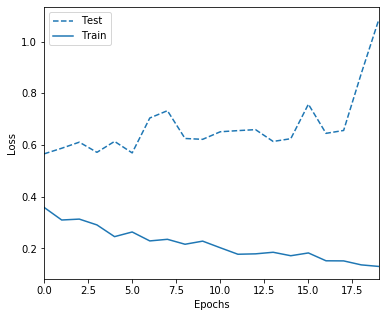

In [21]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

history = model.fit(X_train,
          pd.get_dummies(y_train),
          epochs=20,
          validation_data=(X_test, pd.get_dummies(y_test))
         )
plot_loss(history)
test_loss, test_acc = model.evaluate(X_test, pd.get_dummies(y_test))
print('Test accuracy:', test_acc)

### Recall

In [22]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

In [23]:
recall_score(y_test, model.predict_classes(X_test)),\
accuracy_score(y_test, model.predict_classes(X_test)),\
f1_score(y_test, model.predict_classes(X_test))

(0.758220502901354, 0.7547709923664122, 0.7531219980787703)

In [24]:
print('전체채팅수{}, 유해채팅수{}'.format(len(X_test),model.predict_classes(X_test).sum()))

전체채팅수1048, 유해채팅수524


In [25]:
print('전체채팅수{}, 유해채팅수{}'.format(len(x_padded),model.predict_classes(x_padded).sum()))

전체채팅수42000, 유해채팅수11799


In [93]:
# model_up.save('../model/cnn_bpe.h5')